# Phase Lag Index (PLI)


The PLI is a measure of the asymmetry of the distribution of phase differences between two signals.

PLI connectivity matrix (8-12 Hz):
[[0. 0.]
 [1. 0.]]


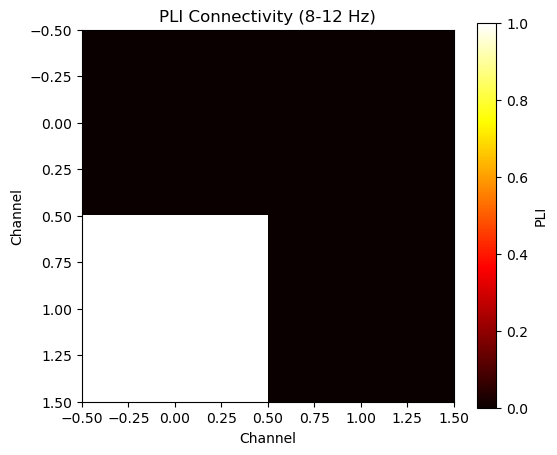

In [1]:
# Method: 
# Author: Hanwei Liu <violalhw@gmail.com>
# Date: 2025-04-04

import numpy as np
import matplotlib.pyplot as plt
from mne_connectivity import spectral_connectivity_epochs

# 模拟参数
sfreq = 1000           # 采样率
n_epochs = 20          # epoch 数量
n_signals = 2          # 信号数（两个通道）
t = np.linspace(0, 1, int(sfreq), endpoint=False)  # 时间轴

# 创建模拟数据：两个通道均为10Hz正弦波，但第二个通道相比第一个通道有固定相位差
data = np.empty((n_epochs, n_signals, len(t)))
phase_lag = np.pi / 4  # 固定相位差（45°）
for i in range(n_epochs):
    noise1 = 0.1 * np.random.randn(len(t))
    noise2 = 0.1 * np.random.randn(len(t))
    signal1 = np.sin(2 * np.pi * 10 * t) + noise1
    signal2 = np.sin(2 * np.pi * 10 * t + phase_lag) + noise2
    data[i, 0, :] = signal1
    data[i, 1, :] = signal2

# spectral_connectivity_epochs 需要输入为 list of ndarray，每个 ndarray 形状为 (n_channels, n_times)
data_epochs = [data[i] for i in range(n_epochs)]

# 计算 PLI（Phase Lag Index）连接性
con = spectral_connectivity_epochs(
    data_epochs, method='pli', sfreq=sfreq, mode='multitaper',
    fmin=8, fmax=12, faverage=True, verbose=False)

# 输出 PLI 连接矩阵（二维矩阵，通道×通道，取第一个频段结果）
print("PLI connectivity matrix (8-12 Hz):")
print(con.get_data(output='dense')[:, :, 0])

# 可视化 PLI 连接矩阵
plt.figure(figsize=(6, 5))
plt.imshow(con.get_data(output='dense')[:, :, 0], interpolation='nearest', cmap='hot', vmin=0, vmax=1)
plt.title('PLI Connectivity (8-12 Hz)')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.colorbar(label='PLI')
plt.show()


[[1]](https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.20346) Stam, C. J., Nolte, G., & Daffertshofer, A. (2007). Phase lag index: assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. Human brain mapping, 28(11), 1178-1193.